# Communicate Data Findings (Ford GoBike Trips)

## by Areej Albishi

## Investigation Overview
In this project, I will work on the 2017 dataset CSV file by going throw the three steps univariate exploration, bivariate exploration and multivariate exploration. I will study some factors that affects trips duration and focus on member gender,user types , months and weekdays that might affect the trips.throw studying relation between two or more columns.
## Dataset Overview
This Dataset includes information about each individual rides intended to make a short trip by bike using Ford GoBike Trips sharing system that located in san Francisco. Bay Area Bike Share is a company that have customer and subscribers for providing  them with on-demand bike rentals.Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city.


In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob
import os
%matplotlib inline
import seaborn as sb

import math
from math import radians, sin, cos, acos
no_color = sb.color_palette()[0]
color = sb.color_palette()[1]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

**Collect The Data**

In [37]:
df= pd.read_csv("2017-fordgobike-tripdata.csv")

**Acess The Data**

In [38]:
df.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year member_gender  
0            -122.415929       96    Customer             1987.0          Male  
1            -122.426614       88    Customer             1965.0        Female  
2            -122.267764     1094    Customer                NaN           NaN  
3            -122.408445     2831    Customer                NaN           NaN  
4            -122.265896     3167  Subscriber             1997.0        Female

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [40]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.000000             37.774520   
50%                -122.398870       66.000000             37.783830   
75%                -122.391034      134.000000             37.795392   
max                -121.874119      340.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          519700.000000  519700.000000      453159.000000  
mean             -122.363236    1672.533079        1980.404787  
std                 0.105122     971.356959          10.513488  
min              -122.444293      10.000000        1886.000000  
25%              -122.410345     787.000000        1974.000000  
50%              -122.398525    1728.500000        1983.000000  
75%              -122.391034    2520.000000        1988.000000  
max              -121.874119    3733.000000        1999.000000

In [41]:
df.duplicated().sum()

0

**Clean Data**
1. change start_time ,end_time to timestamp.
2. member birth year has dates prior to 1900
3. we can further enhance the dataset with more details about the time like month, day, hour, weekday
4. we can calculate the distance for rides between stations
5. drop coloumn that will not be used in analysis

In [42]:
# change from start_time ,end_time from object to timestamp.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 59.5+ MB


In [44]:
df.head()

duration_sec              start_time                end_time  \
0         80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1         78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
2         45768 2017-12-31 22:45:48.411 2018-01-01 11:28:36.883   
3         62172 2017-12-31 17:31:10.636 2018-01-01 10:47:23.531   
4         43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year member_gender  
0            -122.415929       96    Customer             1987.0          Male  
1            -122.426614       88    Customer             1965.0        Female  
2            -122.267764     1094    Customer                NaN           NaN  
3            -122.408445     2831    Customer                NaN           NaN  
4            -122.265896     3167  Subscriber             1997.0        Female

use start_time and end_time to get more informaton in separeat column such as day,month, month_name and hour

In [45]:
#get information from start_time
#get day from start_time
df['Start_time_day']=df['start_time'].dt.day.astype(int)
# get month number from start_time
df['Start_time_month']=df['start_time'].dt.month.astype(int)
# get month name from start_time
df['Start_time_month_name']=df['start_time'].dt.strftime('%B')
# get start Year from start_time
df['Start_time_year']=df['start_time'].dt.strftime('%Y')
# get weekday from start_time
df['Start_time_weekday']=df['start_time'].dt.strftime('%A')
# get hour from start_time
df['Start_time_hour']=df['start_time'].dt.hour
# To simplify the plot, i will transform the seconds to minutes by divie the duration to 60
df['duration_min']= df['duration_sec'] /60
#df['member_birth_year']=df['member_birth_year'].datetime()

In [46]:
#get information from end_time
# get day from end_time
df['End_time_day']=df['end_time'].dt.day.astype(int)
# get month number from end_time
df['End_time_month']=df['end_time'].dt.month.astype(int)
# get month name from end_time
df['End_time_month_name']=df['end_time'].dt.strftime('%B')
# get end Year from end_time
df['End_time_year']=df['end_time'].dt.strftime('%Y')
# get weekday from end_time
df['End_time_weekday']=df['end_time'].dt.strftime('%A')
# get hour from end_time
df['End_time_hour']=df['end_time'].dt.hour

In [47]:
df.Start_time_hour = pd.to_datetime(df.Start_time_hour)
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 28 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
Start_time_day             519700 non-null int32
Start_time_month           519700 non-null int32
Start_time_month_name   

In [48]:
# drop nan , unneded coloumn in analysis
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.head()

duration_sec              start_time                end_time  \
0         80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1         78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
2         45768 2017-12-31 22:45:48.411 2018-01-01 11:28:36.883   
3         62172 2017-12-31 17:31:10.636 2018-01-01 10:47:23.531   
4         43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   end_station_id                                   end_station_name  bike_id  \
0              43  San Francisco Public Library (Grove St at Hyde...       96   
1              96                              Dolores St at 15th St       88   
2             245                             Downtown Berkeley BART     1094   
3               5       Powell St BART Station (Market St at 5th St)     2831   
4             247                          Fulton St at Bancroft Way     3167   

    user_type  member_birth_year  ... Start_time_year  Start_time_weekday  \
0    Customer             1987.0  ...            2017              Sunday   
1    Customer             1965.0  ...            2017              Sunday   
2    Customer                NaN  ...            2017              Sunday   
3    Customer                NaN  ...            2017              Sunday   
4  Subscriber             1997.0  ...            2017              Sunday   

                Start_time_hour duration_min End_time_day End_time_month  \
0 1970-01-01 00:00:00.000000016  1335.166667            1              1   
1 1970-01-01 00:00:00.000000015  1313.333333            1              1   
2 1970-01-01 00:00:00.000000022   762.800000            1              1   
3 1970-01-01 00:00:00.000000017  1036.200000            1              1   
4 1970-01-01 00:00:00.000000014   726.716667            1              1   

  End_time_month_name  End_time_year  End_time_weekday  End_time_hour  
0             January           2018            Monday             15  
1             January           2018            Monday             13  
2             January           2018            Monday             11  
3             January           2018            Monday             10  
4             January           2018            Monday              2  

[5 rows x 24 columns]

**All above cells have been set as slide type "Skip". which mean that when the notebook is rendered as http slides, those cells won't show up.**

## univariate exploration

## Distribution of Trips Durations

The average Ford GoBike Rides trips duration is between 1 and 100 minutes. Most duration is between 10 to 13 minutes which shows that people prefer using the bike for short trips.

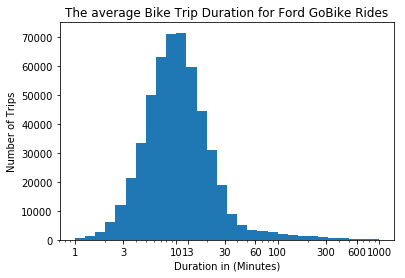

In [49]:
#after changing duration from sec to duration in minutes for more clear results we plot it
#using the log transform.
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10 ,13,30,60,100,300,600,1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=df,x='duration_min' ,bins=bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration in (Minutes)');
plt.title('The average Bike Trip Duration for Ford GoBike Rides');
plt.ylabel('Number of Trips');

**The plot shows that the average Ford GoBike Rides trips duration is between 1 and 100 minutes. most duration is between 10 to 13 minutes which shows that people prefer using the bike for short trips.**

## Distribution of User Gender
Male gender are about 72% more than Female gender in using ford Ford GoBike Rides

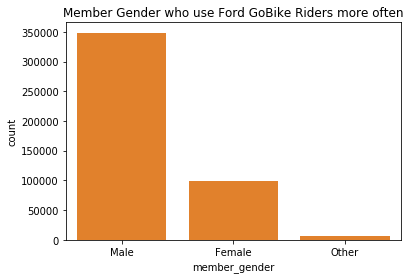

In [50]:
#Nember Gender who use Ford GoBike Riders more often
sb.countplot(data = df, x = 'member_gender', color = color);
plt.title('Member Gender who use Ford GoBike Riders more often');

**From the plot we can see that male gender are about 72% more than female gender in using ford Ford GoBike Rides**

## Distribution of user type
There are 2 types of users 1. customer 2. subscriber , about 77% of users are sumscribers.


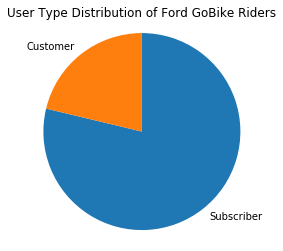

In [51]:
#user Type Distribution of Ford GoBike Riders
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,startangle = 90,counterclock = False);
plt.axis('square')
plt.title('User Type Distribution of Ford GoBike Riders');

**From the plot we can see that there are 2 types of users 1. customer 2. subscriber , we can see that it is about 77% of users are sumscriber**


In [52]:
order=df['start_station_name'].value_counts().index[0:10]

In [53]:
order

Index(['San Francisco Ferry Building (Harry Bridges Plaza)',
       'The Embarcadero at Sansome St',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Berry St at 4th St', 'Powell St BART Station (Market St at 4th St)',
       'Howard St at Beale St', 'Steuart St at Market St'],
      dtype='object')

## 10 most popular station names
Station names are orderd by the most frequently usage ,San Francisco Ferry Building (Harry Bridges Plaza) the most popular. 

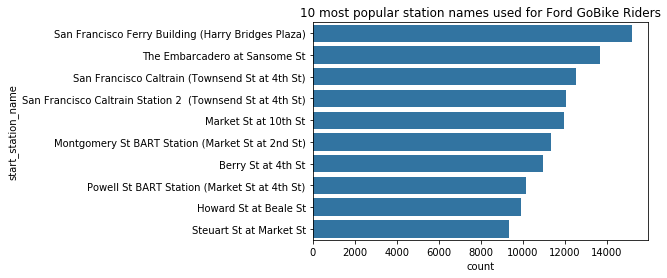

In [54]:
# 10 most popular station names
sb.countplot(data = df, y = 'start_station_name', color = no_color, order =order)
plt.title('10 most popular station names used for Ford GoBike Riders');

**From the chart we can see the 10 popular stations names that used more frequently**

## Duration per Months
period from August to October in 2017 has the highest trip duration while June has the lowest trip duration. In other words, we can say that weather affects the trips duration.

In [55]:
order_month=df['Start_time_month_name'].value_counts().index[0:8]
plot = sb.catplot(data = df, y = 'Start_time_month_name',kind = 'count',color = color,order =order_month);
plot.set_axis_labels('Number of Bike Trips','Month_name');
plt.title('Ford GoBike Usage by Month');


**The most popular month bike trips are on october ,september, november,december and august order as the plot above, jun has lowest trip duration**

## Bivariate exploration

## Age distribution for duration in seconds
Users age who use Ford GoBike Riders are about 18 to 63 years old

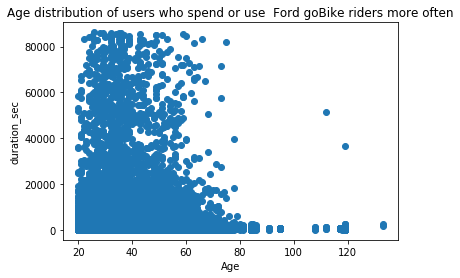

In [56]:
#for easier and more clear plot first i will subtract the current year from the member_birth_year to get the age
df['age'] = 2019- df['member_birth_year']
# Scatter plot
plt.scatter(df['age'], df['duration_sec'])
plt.title("Age distribution of users who spend or use  Ford goBike riders more often")
plt.xlabel("Age")
plt.ylabel("duration_sec")          
plt.show()

**From the scatter plot we can see that users age who use Ford GoBike Riders are about 18 to 63 years old**

In [57]:
#mean age of  users ford bike riders
df['age'].mean()

38.595212717831934

**The mean age for users ford bike is about 37 and 38 years old**

In [58]:
df.Start_time_month.value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: Start_time_month, dtype: int64

## Distribution of trip duration in Minutes Per Months
July,August,september and october have high duration in ford GoBike trips , other words, we can say that wither impact trip duration.

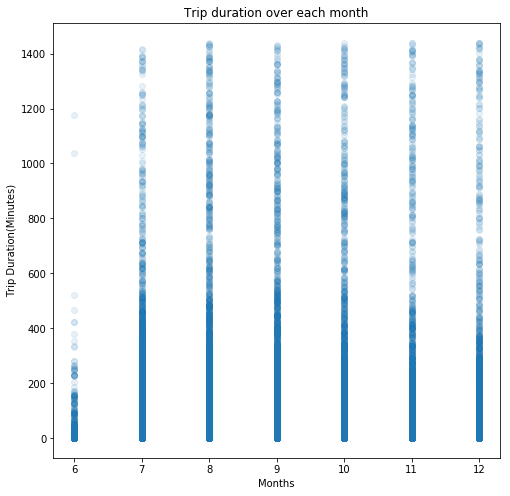

In [59]:
df['month_start'] = pd.DatetimeIndex(df['Start_time_month']).month
# Makes the figure bigger for better visualization 
plt.figure(figsize = [8,8]) 
#  check the trip duration over each month.
plt.scatter(data = df , x = 'Start_time_month' , y = 'duration_min' , alpha = 0.1 )
plt.title('Trip duration over each month')
plt.xlabel('Months')
plt.ylabel('Trip Duration(Minutes)');

**From plot we can say that July,August,september and october has more duration in ford GoBike trips.**

## Distribution of user type per month
Subscribers are using Ford Gobike trips more than customers in all months.

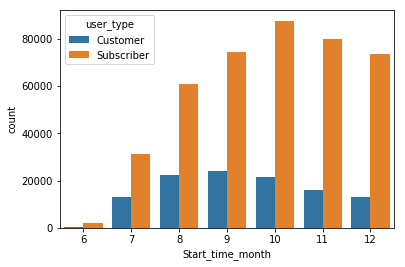

In [60]:
# monthly usage of Ford bikes for each  user type(customer,subscriber)
sb.countplot(data = df, x = 'Start_time_month', hue = 'user_type');

**We can see from the plot that subscriber are using Ford Gobike trips more than customers in all months**

## Duration of GoBike Trips Based on Season
Summer has the highest trip duration, fall and winter has no big defferent changes.

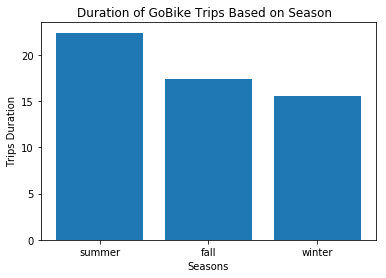

In [61]:
# from the column Start_time_month  i collect 7 months [6,7,8,9,10,11 and 12] and from that i will make my plot based on these 7 months
summer = df.query('Start_time_month in ["6" , "7" , "8"] ').duration_min.mean()
fall = df.query('Start_time_month in ["9" , "10" , "11"] ').duration_min.mean()
winter = df.query('Start_time_month =="12"' ).duration_min.mean()

plt.bar(['summer','fall','winter'],[summer , fall , winter] )
plt.title('Duration of GoBike Trips Based on Season  ')
plt.xlabel('Seasons')
plt.ylabel('Trips Duration');

**Summer has the highest trip duration, fall and winter has no big defferent chnges.**

In [62]:
df.Start_time_weekday.value_counts()

Tuesday      87865
Wednesday    87752
Thursday     85243
Monday       81410
Friday       81165
Saturday     50874
Sunday       45391
Name: Start_time_weekday, dtype: int64

## Number of GoBike Trips per week
The Week usage of Ford Gobikes trips for subscriber users are much more than customer users

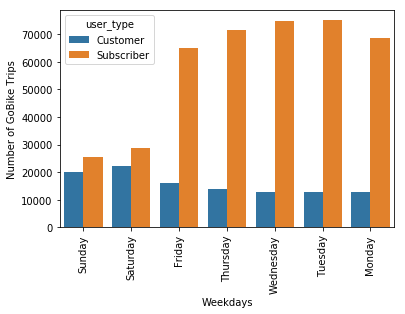

In [63]:
# Weekday usage of Ford bikes for each  user type(customer,subscriber)
sb.countplot(data = df, x = 'Start_time_weekday', hue = 'user_type')
plt.xlabel('Weekdays')
plt.ylabel('Number of GoBike Trips');
plt.xticks(rotation = 90);

**Weekdays usage of Ford Gobikes trips in subscriber users are much more than customer users**

## user type  of Ford Gobikes for each  user gender
Male gender who use Ford bikes are higher in customer and subscribers user_type which can give us a sight that male are more comfort in using Ford bikes than female

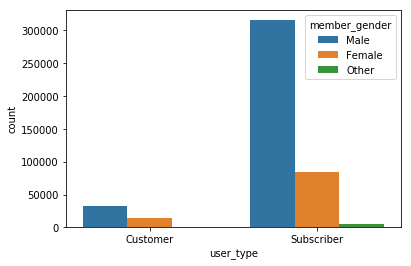

In [64]:
# user_type  of Ford Gobikes for each  member_gender(male,female)
sb.countplot(data = df, x = 'user_type', hue = 'member_gender')
plt.xlabel('user_type');


**Male gender who use Ford bikes are higher in customer and subscribers user_type which can give us a sight that male are more comfort in using Ford bikes than female**

## Multivariate exploration

## Monthly usage of Gobike Trips  per user type and user gender
Customers have similar reults for both male and female ,the highest demand on september then october then August and november have similar results. for subscribers also male and female have similar results reaching the peak on october then november after that september and december have similar results.

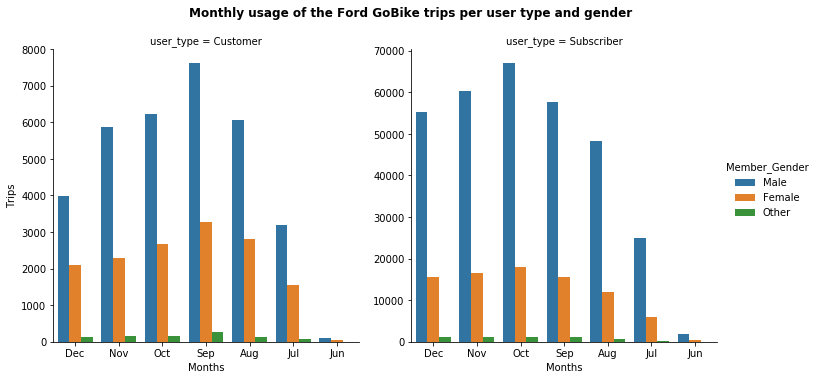

In [65]:
# monthly usage of Gobike Trips  per user_type and member_gender
# take the short word of months name
df['Start_time_month_name']=df['start_time'].dt.strftime('%b')
plot= sb.catplot(data=df, x='Start_time_month_name', col="user_type", hue="member_gender", kind='count', sharey = False)
plot.set_axis_labels("Months","Trips" )
plot._legend.set_title('Member_Gender')
plot.fig.suptitle('Monthly usage of the Ford GoBike trips per user type and gender',y=1.05,fontweight='bold');

**From the plot customer have similar reults for both male and female ,the highest demand on september then october then August and nouvmber have similar results. for subscriber also male and female have similar result reaching the peak on october then nouvmber after that september and decmber have similar results.**

## Weekday usage of Gobike Trips  per user type and user gender
Subscribers male and female get similar results, their highest demand on tuesday , wednesday and thursday with slitly less trips for male on thursday. Customers trips highest demand for male are similar on friday and saturday after that sunday and tuesday ,while customer female have more trips on saturday then sunday after that friday while the rest of the week have similar results.

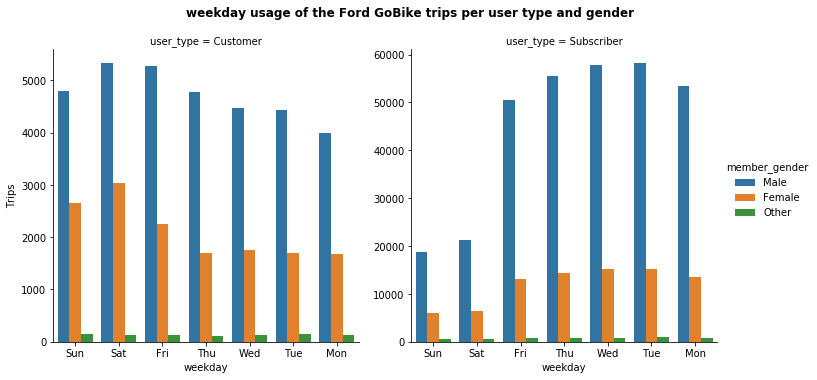

In [66]:
# weekday usage of Gobike Trips  per user_type and member_gender
# take the short word of weekday name
df['Start_time_weekday']=df['start_time'].dt.strftime('%a')
plot= sb.catplot(data=df, x='Start_time_weekday', col="user_type", hue="member_gender", kind='count', sharey = False)
plot.set_axis_labels("weekday", "Trips")
plot._legend.set_title('member_gender')
plot.fig.suptitle('weekday usage of the Ford GoBike trips per user type and gender', y=1.05, fontweight='bold');

**The plot shows that Subscribers male and female get similar results, their highest demand on tuesday and wednesday and thursday with slitly less trips for male on thursday. Customers trips highest demand for male are similar on friday and saturday after that sunday and tuesday ,while customer female have more trips on saturday then sunday after that friday while the rest of the week have similar results.**

## Monthly usage of the Ford GoBike trips per user type and weekdays
Customers are more likly to use ford bike trips on weekend days (saturday and sunday) in all months while subscribers shows that they are more likely tend to use ford bike trips on weekdays in all months.

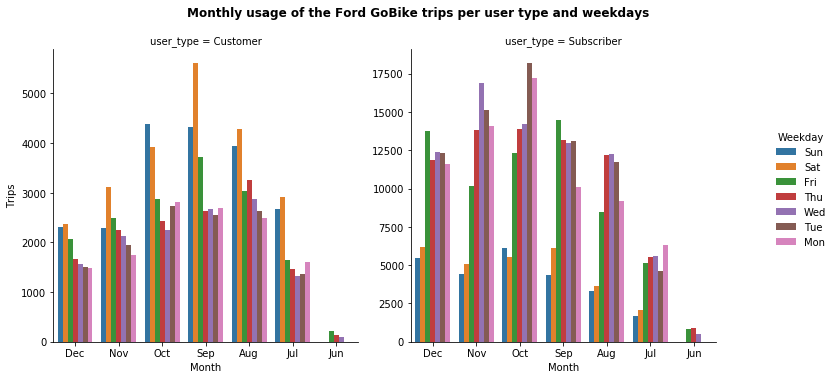

In [67]:
# monthly usage of the Ford GoBike trips per user type and weekdays
plot= sb.catplot(data=df, x='Start_time_month_name', col="user_type", hue="Start_time_weekday", kind='count', sharey = False)
plot.set_axis_labels("Month", "Trips")
plot._legend.set_title('Weekday')
plot.fig.suptitle('Monthly usage of the Ford GoBike trips per user type and weekdays', y=1.05, fontweight='bold');

**From the plot we can see that customers are more likly to use ford bike trips on weekend days (saturday and sunday) in all months while subscribers shows that they are more likely tend to use ford bike trips on weekdays in all months.**

## Duration for user type in weekdays
The Trips duration of subscribers are more than customers in Friday tuesday and thursday while customer duration trips increase on the rest of the week. The user type does make an effect on trip duration.

In [68]:
# plot duration_min per user_type and weekdays
plot = sb.FacetGrid(data = df, hue = 'user_type', size = 6, palette = 'colorblind')
plot.map(plt.scatter, 'Start_time_weekday', 'duration_min', alpha = 1/2);
plot.add_legend();
plt.title('plot duration_min per user_type and weekdays');
plt.xlabel('weekdays')
plt.ylabel('Trip Duration(Minutes)');

**The Trips duration of subscribers are more than customers in Friday tuesday and thursday while customer duration trips increase on the rest of the week. The user type does make an effect on trip duration.**

## Duration for user type and month
There are more subscribers than customers in september and august while customers duration are more in the rest of months.user type has effect on trip duration per months.

In [69]:
# plot duration_min per user_type and month_name
plot = sb.FacetGrid(data = df, hue = 'user_type', size = 6, palette = 'colorblind')
plot.map(plt.scatter, 'Start_time_month_name', 'duration_min', alpha = 1/2)
plot.add_legend();
plt.title('plot duration_min per user_type and month_name');
plt.xlabel('month_name')
plt.ylabel('Trip Duration(Minutes)');

**There are more subscribers than customers in september and august while customers duration are more in the rest of months.user type has effect on trip duration per months.**

## Duration  per user gender in weeks
Female duration trips are more in sunday while saturday have almost equally duration trips for both gender , In weekdays male have more duration trips, in other word we can say female are more tend to have longe duration trips on weekend

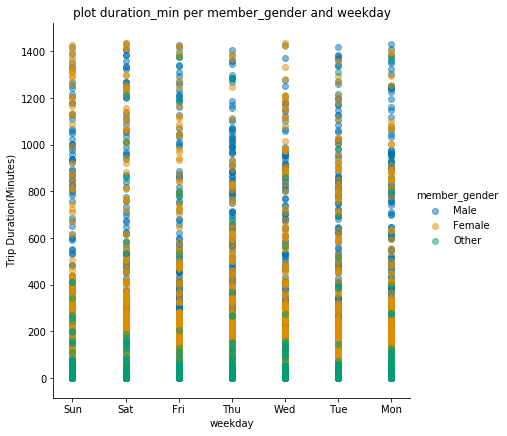

In [70]:
# plot duration_min per member_gender and weekday
plot = sb.FacetGrid(data = df, hue = 'member_gender', size = 6, palette = 'colorblind')
plot.map(plt.scatter, 'Start_time_weekday', 'duration_min', alpha = 1/2)
plot.add_legend();
plt.title('plot duration_min per member_gender and weekday');
plt.xlabel('weekday')
plt.ylabel('Trip Duration(Minutes)');

**Female duration trips are more in sunday while saturday have almost equally duration trips for both gender , In weekdays male have more duration trips, in other word we can say female are more tend to have longe duration trips on weekend**

REFERNCES:
    1. https://www.programiz.com/python-programming/datetime/strftime
    
    2. https://classroom.udacity.com/nanodegrees
    
    3. https://matplotlib.org/gallery/index.html
    
    4. https://seaborn.pydata.org/examples/index.html
    
    5. https://seaborn.pydata.org/tutorial.html
    
    6. https://www.datacamp.com/community/news/matplotlib-tutorial-learn-data-visualization-with-python-in-brief-e82whdx9efq
    
    7. https://stackoverflow.com
    
    8. https://slack.com/intl/en-sa/
    
    9. https://www.geeksforgeeks.org
    
    10. https://www.sfmta.com/getting-around/bike/bike-share